In [1]:
import pandas as pd
train_clean_df = pd.read_csv('/home/workspace/data/GLDv2/train/train_clean_custom_sampling.csv')

In [2]:
train_clean_df['language'].value_counts()

language
en    214176
de     53754
fr     25017
ko       924
Name: count, dtype: int64

In [23]:
train_clean_df.iloc[-1]['description']

'Hoa Lư was the capital of Vietnam from 968 to 1009. It lies in Trường Yên Thượng village, Hoa Lư, Ninh Bình Province. The area is one of ricefields broken by limestone mountains, and is approximately 90 km south of Hanoi. Together with Phát Diệm Cathedral, Tam Cốc-Bích Động, Bái Đính Temple, Tràng An, and Cúc Phương, Hoa Lư is a tourist destinations in Ninh Bình Province.\nIn the late 10th century, Hoa Lư was the capital as well as the economic, political and cultural center of Đại Cồ Việt, an independent Vietnamese polity founded in 968 A.D. by the local warlord Đinh Bộ Lĩnh (posthumously known as Đinh Tiên Hoàng, or "First Dinh Emperor"), following years of civil war and a violent secessionist movement against China\'s Southern Han dynasty. Hoa Lư was the native land of the first two imperial dynasties of Vietnam: the Đinh founded by Đinh Tiên Hoàng, and the Early Lê founded by Lê Đại Hành. Following the demise of the Lê dynasty, in 1010 Lý Công Uẩn, the founder of the Lý dynasty, t

### RecursiveCharacterTextSplitter로 문장 자르기

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=0)
chunks = text_splitter.split_text(train_clean_df.iloc[-1]['description'])

/tmp/ipykernel_22576/1255826961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean_df.iloc[-1]['description_preprocessed'] = chunks[0]


In [36]:
train_clean_df

,Unnamed: 0,id,description,language,description_preprocessed
0,0,92b6290d571448f6,Luitpoldpark is a public park in the Schwabing...,en,None
1,1,cd41bf948edc0340,Luitpoldpark is a public park in the Schwabing...,en,None
2,2,fb09f1e98c6d2f70,Luitpoldpark is a public park in the Schwabing...,en,None
3,3,17660ef415d37059,Luitpoldpark is a public park in the Schwabing...,en,None
4,4,307d6584f473ba35,Die Sparkassen-Arena ist eine Mehrzweckhalle i...,de,None
...,...,...,...,...,...
293866,293866,9401fad4c497e1f9,Hoa Lư was the capital of Vietnam from 968 to ...,en,None
293867,293867,1a5af12bccf60325,Hoa Lư was the capital of Vietnam from 968 to ...,en,None
293868,293868,72c3b1c367e3d559,Hoa Lư was the capital of Vietnam from 968 to ...,en,None
293869,293869,19f4a1bc4bcae084,Hoa Lư was the capital of Vietnam from 968 to ...,en,None


In [29]:
chunks

['Hoa Lư was the capital of Vietnam from 968 to 1009. It lies in Trường Yên Thượng village, Hoa Lư, Ninh Bình Province. The area is one of ricefields broken by limestone mountains, and is approximately 90 km south of Hanoi. Together with Phát Diệm Cathedral, Tam Cốc-Bích Động, Bái Đính Temple, Tràng',
 'An, and Cúc Phương, Hoa Lư is a tourist destinations in Ninh Bình Province.',
 'In the late 10th century, Hoa Lư was the capital as well as the economic, political and cultural center of Đại Cồ Việt, an independent Vietnamese polity founded in 968 A.D. by the local warlord Đinh Bộ Lĩnh (posthumously known as Đinh Tiên Hoàng, or "First Dinh Emperor"), following years of civil',
 "war and a violent secessionist movement against China's Southern Han dynasty. Hoa Lư was the native land of the first two imperial dynasties of Vietnam: the Đinh founded by Đinh Tiên Hoàng, and the Early Lê founded by Lê Đại Hành. Following the demise of the Lê dynasty, in 1010 Lý Công Uẩn, the",
 'founder of th

In [ ]:
from tqdm import tqdm
for index in tqdm(range(len(train_clean_df)), desc="Processing rows"):
    text = train_clean_df.at[index, 'description']  # .at 사용해서 직접 할당 가능
    if pd.isna(text) or text == "":
        train_clean_df.at[index, 'description_preprocessed'] = ""
        continue
    chunks = text_splitter.split_text(text)
    train_clean_df.at[index, 'description_preprocessed'] = chunks[0] if chunks else ""

In [42]:
train_clean_df.iloc[10000]['description_preprocessed']

"La Casa de las Cuatro Torre (en français, Maison des Quatre Tours) est un édifice historique situé dans le quartier de San Carlos à Cadix en Andalousie (Espagne). Il s'agit en réalité d'un ensemble harmonieux formé par quatre maisons. Juan Clat Fragela, marchand syrien établi dans la ville, fut le"

In [43]:
train_clean_df.iloc[10000]['description']

"La Casa de las Cuatro Torre (en français, Maison des Quatre Tours) est un édifice historique situé dans le quartier de San Carlos à Cadix en Andalousie (Espagne). Il s'agit en réalité d'un ensemble harmonieux formé par quatre maisons. Juan Clat Fragela, marchand syrien établi dans la ville, fut le promoteur de ce bâtiment, élevé entre 1736 et 1745. Conscient de la singularité de son projet, Fragela a renoncé à la partie du terrain qu'il possédait pour laisser un espace libre devant la construction et permettre ainsi une meilleure vision de l'ensemble."

In [44]:
train_clean_df['length'] = train_clean_df['description_preprocessed'].str.len()

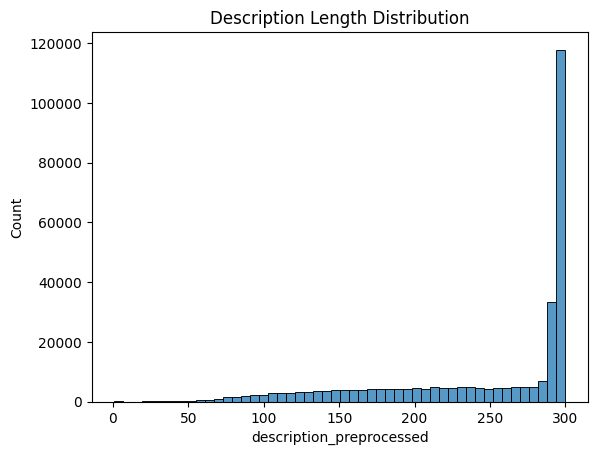

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
# 히스토그램
fig, ax = plt.subplots()
sns.histplot(train_clean_df['description_preprocessed'].str.len(), bins=50, ax=ax)
ax.set_title("Description Length Distribution")
plt.show()

In [46]:
train_clean_df.drop(columns=['length'], inplace=True)

In [47]:
train_clean_df.drop(columns=['description'], inplace=True)

In [48]:
train_clean_df

,Unnamed: 0,id,language,description_preprocessed
0,0,92b6290d571448f6,en,Luitpoldpark is a public park in the Schwabing...
1,1,cd41bf948edc0340,en,Luitpoldpark is a public park in the Schwabing...
2,2,fb09f1e98c6d2f70,en,Luitpoldpark is a public park in the Schwabing...
3,3,17660ef415d37059,en,Luitpoldpark is a public park in the Schwabing...
4,4,307d6584f473ba35,de,Die Sparkassen-Arena ist eine Mehrzweckhalle i...
...,...,...,...,...
293866,293866,9401fad4c497e1f9,en,Hoa Lư was the capital of Vietnam from 968 to ...
293867,293867,1a5af12bccf60325,en,Hoa Lư was the capital of Vietnam from 968 to ...
293868,293868,72c3b1c367e3d559,en,Hoa Lư was the capital of Vietnam from 968 to ...
293869,293869,19f4a1bc4bcae084,en,Hoa Lư was the capital of Vietnam from 968 to ...


In [49]:
train_clean_df.rename(columns={'description_preprocessed': 'description'}, inplace=True)

In [51]:
train_clean_df.to_csv('/home/workspace/data/GLDv2/train/train_clean_custom_sampling_langchain.csv', index=False)